RECONSTRUCTION STATUS: DEGRADED - Hologram is blurry. Check parameters or noise.


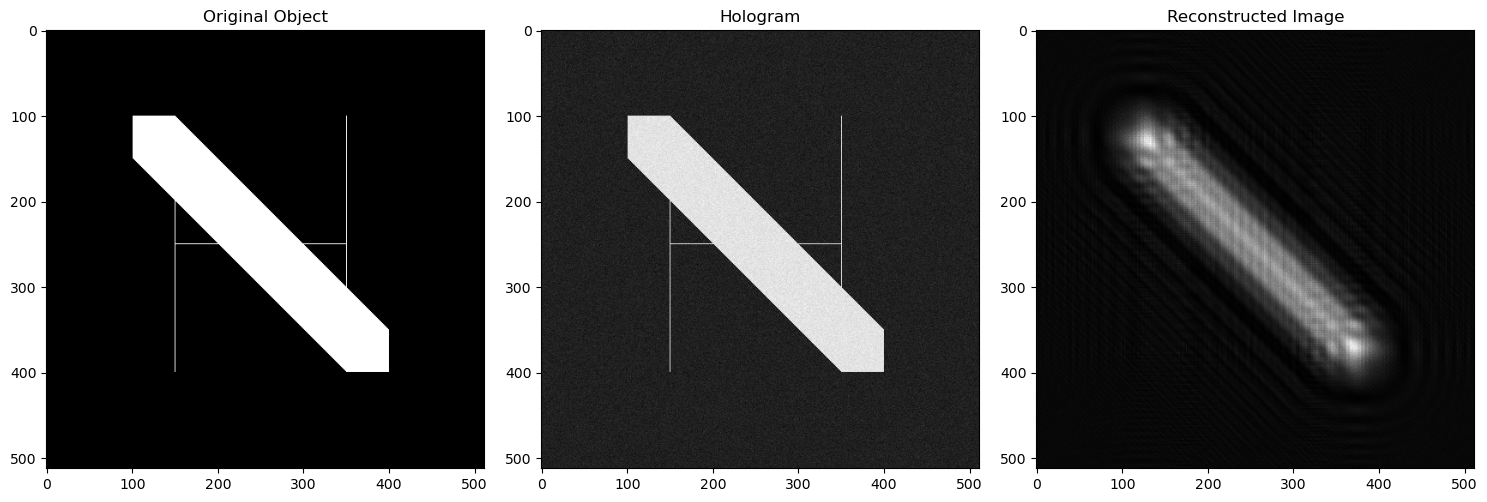

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class HologramSimulator:
    def __init__(self, wavelength=532e-9, pixel_size=6.9e-6):
        self.wavelength = wavelength
        self.pixel_size = pixel_size
        
    def create_sample_object(self, size=512):
        """Creates a simple 2D sample object (the letter 'A')"""
        obj = np.zeros((size, size))
        # Draw a simple 'A' shape
        for i in range(100, 400):
            for j in range(100, 400):
                # Vertical lines
                if (j == 150 or j == 350) and i > 100 and i < 400:
                    obj[i, j] = 1.0
                # Horizontal line
                if i == 250 and j > 150 and j < 350:
                    obj[i, j] = 1.0
                # Diagonal lines
                if abs(i - j) < 50 and i > 100 and i < 400 and j > 100 and j < 400:
                    obj[i, j] = 1.0
        return obj
    
    def simulate_propagation(self, wavefield, distance):
        """Simulates light propagation using Angular Spectrum method"""
        # Get the shape of the wavefield
        rows, cols = wavefield.shape
        
        # Create frequency coordinates
        fx = np.fft.fftfreq(rows, d=self.pixel_size)
        fy = np.fft.fftfreq(cols, d=self.pixel_size)
        FX, FY = np.meshgrid(fx, fy, indexing='ij')
        
        # Calculate the transfer function
        k = 2 * np.pi / self.wavelength
        transfer_function = np.exp(1j * distance * np.sqrt(k**2 - (2*np.pi*FX)**2 - (2*np.pi*FY)**2))
        
        # Apply the transfer function in the frequency domain
        wavefield_fft = np.fft.fft2(wavefield)
        reconstructed_wavefield_fft = wavefield_fft * transfer_function
        
        # Inverse FFT to get the reconstructed wavefield
        reconstructed_wavefield = np.fft.ifft2(reconstructed_wavefield_fft)
        
        return reconstructed_wavefield
    
    def generate_hologram(self, object_depth=0.1):
        """Generates a synthetic in-line hologram"""
        # Create object wave
        object_wave = self.create_sample_object()
        
        # Add phase to simulate depth
        object_wave = object_wave * np.exp(1j * 2 * np.pi * object_depth / self.wavelength)
        
        # Simulate the reference wave (a simple plane wave)
        reference_wave = np.ones_like(object_wave)
        
        # Combine them to create an interference pattern (the hologram)
        hologram = np.abs(object_wave + reference_wave)**2
        
        # Add some noise to make it more realistic
        noise = np.random.normal(0, 0.1, hologram.shape)
        hologram += noise
        
        return hologram
    
    def reconstruct(self, hologram, distance):
        """Reconstructs the hologram at a given distance"""
        # For reconstruction, we treat the hologram as if it were illuminated by the reference wave
        reconstruction = self.simulate_propagation(hologram, distance)
        intensity = np.abs(reconstruction)**2
        return intensity
    
    def assess_quality(self, reconstructed_image):
        """Health check function for the reconstruction"""
        # Calculate a focus metric (variance of the image)
        focus_metric = np.var(reconstructed_image)
        
        # Check if the reconstruction is good
        if focus_metric > 100:  # Arbitrary threshold
            status = "RECONSTRUCTION STATUS: OK - Hologram integrity is good. Object is in focus."
        else:
            status = "RECONSTRUCTION STATUS: DEGRADED - Hologram is blurry. Check parameters or noise."
        return status

# Example usage
if __name__ == "__main__":
    # Create simulator instance
    sim = HologramSimulator()
    
    # Generate a hologram
    holo = sim.generate_hologram(object_depth=0.1)
    
    # Reconstruct the hologram
    recon = sim.reconstruct(holo, distance=0.1)
    
    # Assess the quality
    status = sim.assess_quality(recon)
    
    # Display results
    print(status)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.imshow(sim.create_sample_object(), cmap='gray')
    plt.title('Original Object')
    
    plt.subplot(132)
    plt.imshow(holo, cmap='gray')
    plt.title('Hologram')
    
    plt.subplot(133)
    plt.imshow(recon, cmap='gray')
    plt.title('Reconstructed Image')
    
    plt.tight_layout()
    plt.savefig("figures
    plt.show()